In [1]:
import requests
from bs4 import BeautifulSoup

# scraping livejournal

### Searching entries by popular words

In [166]:
from collections import Counter

In [189]:
myv_counter = Counter(df.myv)
myv_counter.most_common(10)

[('ванстомс', 6),
 ('чавомс', 6),
 ('кундамс', 5),
 ('нолдамс', 5),
 ('улемс', 4),
 ('велявтомс', 4),
 ('башка', 4),
 ('лисемс', 4),
 ('верьга', 4),
 ('панемс', 4)]

In [176]:
visited_urls = set()
visited_words = set()
results = []

In [186]:
import urllib.parse

def get_jj(query, size=30):
    query_q = urllib.parse.quote_plus(query)
    r = f'https://www.livejournal.com/tools/endpoints/rsearch?&size={size}&from=0&sort=_score&type=post&query={query_q}&adult=0'
    out = requests.get(r)
    return out.json()


In [190]:
len(get_jj('ванстомс')['matches'])

30

In [141]:
import pickle

with open('mini_langid_v2.pkl', 'rb') as f:
    langid = pickle.load(f)

In [281]:
import random
from razdel import tokenize
import re
from tqdm.auto import tqdm, trange

In [288]:
MIN_WORD_LEN = 3

In [289]:
def get_words(text):
    words = []
    for token in tokenize(text):
        w = token.text.lower()
        if re.match('[а-яё]+$', w) and len(w) >= MIN_WORD_LEN:
            words.append(w)
    return words

In [283]:
all_matches = []

In [379]:
for i in trange(10000):
    query = random.choice([w for w, c in myv_counter.most_common(100) if w not in visited_words and len(w) >= MIN_WORD_LEN])
    visited_words.add(query)
    myv_counter[query] = -1000000

    j = get_jj(query)
    for m in j['matches']:
        text = m['subject'] + '\n' + m['body']
        text = text.replace('<b>', ' ').replace('</b>', ' ')
        langs = dict(zip(langid.classes_, langid.predict_proba([text])[0]))
        m['langid_v2'] = langs
        m['query'] = query
        m['good_lang'] = False
        if langs['myv'] > 0.8:
            myv_counter.update(get_words(text))
            m['good_lang'] = True
    all_matches.extend(j['matches'])
    print(i, query, len(j['matches']), len([m for m in j['matches'] if m['good_lang']]))
    
    for w in visited_words:
        myv_counter[w] = -100000

  0%|          | 0/10000 [00:00<?, ?it/s]

0 выставка 30 0
1 искусствань 28 25
2 чистенть 18 17
3 ванодо 0 0
4 поэтэнть 22 22
5 анге 30 0
6 васень 29 5
7 кшуманцясо 3 3
8 книгась 30 0
9 торама 0 0
10 сурксонть 4 4
11 кото 30 0
12 церат 29 1
13 иензэ 13 9
14 цёра 29 11
15 пророка 30 0
16 мода 30 0
17 тештине 26 17
18 ниле 30 0
19 журналонь 27 20
20 вейсэндявксось 24 23
21 тона 29 0
22 топавтоманть 6 6
23 теевиль 21 21
24 ютавтомо 29 28
25 вирев 30 0
26 лувонь 29 21
27 састо 28 1
28 ушодомс 17 14
29 корни 30 0
30 валскес 23 15
31 курссо 30 1
32 морыцятне 30 25
33 маринк 30 0
34 мазычинь 13 10
35 кедть 30 22
36 конференция 28 0
37 сёрмадомс 25 18
38 теезь 0 0
39 прась 28 0
40 кольца 30 0
41 ваномс 30 19
42 ундокст 6 5
43 вечкемазо 8 8
44 эно 30 0
45 килейне 30 9
46 ветян 28 3
47 таркат 30 17
48 менельстэ 19 16
49 мокшень 30 8
50 диск 29 0
51 тонавтницятнень 17 17
52 палы 30 0
53 ошов 30 0
54 саранск 30 0
55 чувтось 30 10
56 ансамблянть 30 28
57 ютавтомс 30 28
58 невти 29 5
59 масторонтень 30 29
60 весементь 30 27
61 храброй 0 0
62

474 эрясь 30 0
475 чангодть 30 16
476 сайтэсь 0 0
477 эйкакшонть 21 21
478 вечктян 30 16
479 долгай 30 0
480 чудезэ 10 10
481 пичкавтомс 0 0
482 ютазо 30 13
483 рябовнень 4 4
484 панжсы 20 19
485 тевс 26 0
486 кансонзо 2 2
487 энялдсь 30 29
488 сёрмадсь 30 21
489 моления 29 0
490 витемс 29 26
491 эрий 30 0
492 викшнезь 30 29
493 покштятне 30 23
494 гайгсь 30 5
495 карминь 29 0
496 тонавтницят 30 23
497 ялгам 27 1
498 тензе 28 0
499 завещание 30 0
500 стувтыть 30 18
501 майатул 30 1
502 самаре 0 0
503 пси 30 0
504 творческой 29 0
505 алов 30 0
506 тонавтнесть 16 14
507 полань 30 0
508 евтни 0 0
509 кастынзе 1 1
510 невтьсы 21 19
511 лездамо 30 26
512 лувонть 30 26
513 мелесь 28 0
514 бажан 26 0
515 вейкень 30 25
516 ендо 29 0
517 синий 30 0
518 ёвтыть 26 25
519 раськентень 30 28
520 пеле 30 0
521 артомо 22 7
522 икелепингень 6 6
523 огарев 30 0
524 цёранть 0 0
525 деряй 29 0
526 ошсто 29 21
527 алят 0 0
528 лисемс 29 21
529 сазо 30 0
530 ормадо 30 14
531 войнань 0 0
532 лезэв 15 11
533 

941 эйдекс 25 20
942 повне 0 0
943 сюк 28 0
944 стить 29 0
945 сюкони 30 27
946 эйкакшнене 20 18
947 пазмариесь 9 8
948 содылизь 23 20
949 сюкпрят 30 13
950 менелесь 30 0
951 ушодсы 11 11
952 сонськак 26 21
953 свет 28 0
954 ютамо 28 19
955 вечктядо 3 0
956 марявить 30 23
957 тешкстамс 21 17
958 визди 29 1
959 юткс 30 20
960 виест 29 0
961 кирдий 29 0
962 эрицят 30 21
963 анокстась 30 21
964 кучить 30 0
965 лув 29 2
966 оршамопельде 1 1
967 иесте 27 0
968 рузт 28 19
969 анокстамось 30 28
970 сядот 30 24
971 арсиця 30 1
972 анс 29 0
973 пачк 0 0
974 история 0 0
975 эрсить 30 0
976 ливти 29 6
977 колы 29 0
978 ульяновской 28 0
979 баку 30 0
980 мазыйне 25 13
981 улезе 30 1
982 энялдтано 25 20
983 лецтнема 6 5
984 велявтыть 30 17
985 меельцекс 23 19
986 содавтылизе 5 5
987 вейкеть 29 24
988 пингенть 25 22
989 покштянок 30 28
990 минденек 14 12
991 раскетнень 11 11
992 фильма 28 0
993 ардтнесь 30 25
994 теемадо 18 17
995 топавты 0 0
996 весемене 30 26
997 инешкипазне 10 10
998 тонавтнемадо

1386 кеминь 29 2
1387 суоминь 30 5
1388 нуштайкин 29 1
1389 сесте 0 0
1390 сараз 29 0
1391 кельсодый 8 8
1392 окошком 30 0
1393 тежа 27 0
1394 эрзянка 30 1
1395 книгасонть 8 7
1396 сюлмавкстне 3 3
1397 ушодызе 30 25
1398 мокшэрзятне 9 6
1399 сетнень 24 23
1400 пизёлнэ 30 10
1401 палыця 29 8
1402 каи 30 0
1403 тевсэнзэ 4 3
1404 эсеть 30 0
1405 оршамопелень 17 17
1406 штатолсонть 20 20
1407 над 0 0
1408 спектаклянь 10 9
1409 евтнемс 18 16
1410 иневиенть 14 14
1411 православиянь 10 8
1412 спектакля 30 0
1413 тердсь 30 12
1414 чувтосо 19 14
1415 тимофеевна 29 0
1416 петровань 29 4
1417 питне 30 0
1418 важодицятне 21 19
1419 истории 30 0
1420 сэредицятнень 21 21
1421 вечкевиксэм 30 20
1422 тестэ 30 14
1423 член 30 0
1424 нижегородской 29 0
1425 конатнеде 13 12
1426 озномо 30 21
1427 шлясы 29 10
1428 чарыть 30 0
1429 ёнкссто 10 9
1430 ковкерьксте 3 3
1431 кизэ 28 13
1432 неян 30 8
1433 иньванькс 12 12
1434 пишут 28 0
1435 кази 0 0
1436 чуди 30 0
1437 казинзе 29 7
1438 савкшнось 30 26
1439 яр

1828 маар 0 0
1829 руцясо 17 14
1830 вирьга 30 5
1831 коллективенть 15 15
1832 содыцянзо 7 7
1833 чистэнзэ 15 14
1834 ракшатне 30 10
1835 ловажатнень 6 6
1836 мельтне 28 23
1837 азарьс 5 5
1838 евтнесть 9 9
1839 озны 30 0
1840 максык 10 6
1841 лецтявить 7 7
1842 конанть 30 1
1843 мерденс 12 6
1844 путызе 27 21
1845 арнемантень 4 4
1846 улема 29 0
1847 села 30 0
1848 мерсть 30 6
1849 ормасо 19 14
1850 тейтерень 30 19
1851 кучи 30 0
1852 орозбиёсо 1 1
1853 тармотнень 7 7
1854 киряксневманзо 4 4
1855 куманжа 21 16
1856 содатано 30 22
1857 ськамот 24 12
1858 почонть 4 4
1859 часошка 5 5
1860 чакшос 14 9
1861 маряст 11 11
1862 ладс 30 17
1863 товгак 17 12
1864 стувтомс 12 9
1865 илязт 30 23
1866 токи 30 0
1867 ломанькс 10 9
1868 якильть 23 22
1869 вастовомо 30 22
1870 тарказонзо 15 14
1871 сявадыцят 30 20
1872 мишанинень 1 1
1873 ракшатнень 30 30
1874 ладсевкс 2 2
1875 театрализованной 30 0
1876 лездыцякс 30 30
1877 аштят 28 0
1878 эзьнестэ 4 4
1879 весимирень 6 6
1880 путомга 8 8
1881 атя 

2271 ванстыцякс 16 16
2272 путовкссонть 0 0
2273 кутьмерь 7 7
2274 яволявтозь 15 15
2275 ловнось 28 2
2276 ёлганя 8 4
2277 валдось 30 0
2278 стакачинть 14 9
2279 кулозь 29 23
2280 роботник 30 0
2281 чувтос 19 14
2282 вастовомат 14 11
2283 кедьстэ 27 23
2284 алкукскак 18 12
2285 кортамот 15 13
2286 рунгось 0 0
2287 ськамом 27 5
2288 сёрмадовкст 18 15
2289 риа 30 0
2290 оршазь 25 20
2291 пингесь 29 0
2292 мирослава 0 0
2293 эйсэнк 0 0
2294 аштиця 29 26
2295 кукушка 30 0
2296 мария 0 0
2297 аношкин 30 2
2298 велявтови 10 3
2299 видевксэнек 7 7
2300 ильтема 4 1
2301 оймензэ 20 17
2302 покшт 29 8
2303 тюркань 0 0
2304 якстерь 30 13
2305 пазават 5 3
2306 окойники 0 0
2307 сокссо 10 7
2308 ковава 30 2
2309 преа 0 0
2310 седейне 9 3
2311 инешкипазу 0 0
2312 озкснеде 4 4
2313 ветямо 19 16
2314 ваставинь 1 1
2315 сюпавдояк 17 15
2316 оеськак 4 4
2317 обидел 27 0
2318 церанть 17 15
2319 вастневсь 0 0
2320 невсы 30 0
2321 ламонь 29 0
2322 стяк 0 0
2323 атясь 0 0
2324 кадовить 30 7
2325 новолиль 6 

2712 толныненть 2 2
2713 ялгатнень 14 12
2714 раскетненьдяк 4 4
2715 семёновна 29 0
2716 профессором 0 0
2717 кургиненк 30 17
2718 сыргасть 14 11
2719 ютавтневить 0 0
2720 кулыцянть 7 4
2721 вересь 30 0
2722 каштанчи 17 16
2723 молитцят 26 0
2724 проектэнть 9 7
2725 ведьпрядонть 7 7
2726 андреевич 0 0
2727 муеви 28 8
2728 здесь 0 0
2729 серьгеди 19 15
2730 сюлмавсь 23 21
2731 ноябрянь 29 4
2732 косояк 27 17
2733 ёмить 29 8
2734 презентация 30 0
2735 ракшат 29 4
2736 разные 26 0
2737 чачинь 29 1
2738 тюст 19 6
2739 домкачинзе 4 4
2740 народное 30 0
2741 кепедемс 8 8
2742 сеньде 11 8
2743 кирьдиензе 4 4
2744 кикс 29 0
2745 эрямонтень 12 11
2746 тувталтнень 11 11
2747 ванномо 23 21
2748 пеель 0 0
2749 ломанте 30 24
2750 алексеев 30 0
2751 чавить 29 0
2752 тюреме 24 5
2753 эрямостот 7 6
2754 чамдасызь 6 6
2755 вейсэндямонь 6 5
2756 ветицясь 30 17
2757 чарькоде 30 24
2758 ледстнемань 10 8
2759 ильведькснень 9 9
2760 таньшкавтынк 29 29
2761 цебарясь 30 1
2762 мезьде 11 6
2763 ёми 27 0
2764 к

3148 килеенть 13 11
3149 видяз 29 4
3150 сэньпацинесь 2 1
3151 инешкинь 7 5
3152 медьсэ 14 14
3153 тарказанзо 4 4
3154 радости 30 0
3155 хирургия 30 0
3156 пейдстевтиця 6 6
3157 терявтнесть 14 14
3158 конгресе 26 0
3159 паксянть 18 15
3160 григошинэнь 1 1
3161 сюлмилизь 8 8
3162 рестазь 16 16
3163 содамочи 30 29
3164 нейке 30 0
3165 човорямо 13 13
3166 аштесть 30 23
3167 смусттеме 6 6
3168 лездаст 30 27
3169 эждилизе 4 4
3170 пурги 29 0
3171 кевкстематне 7 7
3172 оршамопельсэ 21 19
3173 кудазоравась 20 15
3174 сорока 30 0
3175 велесэнзэ 5 4
3176 понги 30 0
3177 озкспал 30 17
3178 лововсь 0 0
3179 озномат 9 4
3180 эрямокить 5 5
3181 проектэнтень 3 3
3182 стану 29 0
3183 стакачить 24 14
3184 покштянзо 22 17
3185 ковгак 22 10
3186 любимою 30 0
3187 кастыть 26 0
3188 мелявкст 9 7
3189 моросонть 11 10
3190 невтезельть 8 7
3191 степановонь 2 1
3192 кучизе 20 17
3193 вийшкиэрий 29 28
3194 содамочист 6 6
3195 покштояк 13 10
3196 пурнавксне 1 1
3197 пельксте 30 26
3198 тыщань 6 6
3199 казсть 15

3588 роща 30 0
3589 шкинемасо 16 14
3590 мельвановикс 12 9
3591 неемадонть 3 3
3592 ванстовсь 29 20
3593 отделениянь 8 7
3594 наряжазь 11 11
3595 сэредицянь 8 8
3596 ведьпрянтень 6 6
3597 совамо 30 13
3598 валомстонзо 6 6
3599 краень 28 1
3600 драматической 29 0
3601 лови 30 0
3602 гитарам 29 0
3603 несть 28 0
3604 заветы 30 0
3605 эрямостонть 6 5
3606 галань 30 1
3607 нолдынк 19 7
3608 ведьбрянтень 6 6
3609 ванст 29 20
3610 ваяя 0 0
3611 касовксонь 5 5
3612 тевензе 13 13
3613 изницятне 13 8
3614 инешкинеманть 4 4
3615 курочкинэнь 2 1
3616 эрьвань 7 5
3617 кандомо 28 1
3618 выхожу 29 0
3619 ерзя 30 0
3620 тонавтыцянь 12 10
3621 ушолксонть 7 7
3622 кандтни 20 15
3623 пизезест 7 7
3624 максомо 29 14
3625 миньгак 14 11
3626 енкснень 7 7
3627 ламодояк 9 9
3628 кискатне 0 0
3629 модалангонь 6 6
3630 гай 30 0
3631 редакциясо 29 5
3632 петра 0 0
3633 тюремадо 4 3
3634 шкадо 30 0
3635 нолдамодо 10 9
3636 шкиницяст 6 5
3637 эрямосонзо 12 12
3638 апаротне 8 8
3639 озкспалонь 21 13
3640 тонавтомс

4029 панжакайть 5 4
4030 эрицясь 30 22
4031 ндч 29 0
4032 детские 29 0
4033 эсинек 11 11
4034 про 0 0
4035 кортамонть 16 14
4036 томбалеяк 10 7
4037 эрямоенксонь 7 7
4038 пиженть 13 13
4039 банядо 10 4
4040 совавтозь 6 6
4041 виезэ 10 5
4042 орданьбуе 20 13
4043 кемтяно 20 10
4044 тяпор 4 4
4045 сельмедематнень 2 2
4046 мифологиянь 7 7
4047 украинань 30 5
4048 кшинь 30 0
4049 шканеяк 7 5
4050 шкинеде 11 11
4051 лиядсь 30 8
4052 тонавтомадонть 4 4
4053 кунсолан 6 4
4054 топавтовить 30 22
4055 пельтнень 9 9
4056 путь 29 0
4057 тееменде 5 5
4058 варминесь 30 8
4059 сэредьксэнть 7 5
4060 бочканова 30 1
4061 нарылизь 5 5
4062 микитань 30 3
4063 кудозон 4 3
4064 лопатне 30 0
4065 паприкаш 30 0
4066 орозбиень 8 7
4067 несь 30 0
4068 кенкшнень 12 12
4069 ёвтазь 18 17
4070 макстая 29 4
4071 неявсь 30 0
4072 шикадик 2 1
4073 вачо 29 0
4074 саика 29 0
4075 теиль 25 0
4076 воронина 29 0
4077 вармине 30 8
4078 вейкетьстэ 16 15
4079 тыньсь 29 0
4080 арсицяст 2 2
4081 куринкатнева 7 5
4082 урале 30 0

4467 цератнень 9 8
4468 алтазель 9 8
4469 кенярксчитне 5 4
4470 ледяйкин 29 0
4471 меркушкин 29 0
4472 несынек 10 8
4473 оргоди 15 12
4474 оськинань 2 2
4475 аноксось 30 0
4476 неблагопристойное 29 0
4477 этнографиянь 11 7
4478 матиас 28 0
4479 понгавтсызь 4 4
4480 коекс 30 5
4481 пичкавтоманть 5 5
4482 видсте 18 12
4483 норовава 30 10
4484 чинзэ 12 5
4485 тевенек 30 21
4486 коцтонть 9 9
4487 пурнызе 17 14
4488 пештясынзе 7 7
4489 чавонь 30 0
4490 вечкеманок 8 7
4491 кенярьксчинть 3 3
4492 поведение 30 0
4493 туицядонть 6 6
4494 школьный 29 0
4495 сюлмазь 12 10
4496 хорось 29 0
4497 видесте 30 0
4498 цецянзо 4 4
4499 ускокшнызь 3 3
4500 экше 30 0
4501 перртьпельксень 2 0
4502 валон 30 0
4503 ловонь 30 6
4504 тешкставт 9 9
4505 кшинть 10 8
4506 кочкурова 30 0
4507 театранть 8 7
4508 вастсь 30 0
4509 стихтне 7 4
4510 кандсь 29 0
4511 вишкинетнень 13 13
4512 муе 30 0
4513 пичкаст 4 4
4514 тевсэнек 12 10
4515 каштмоли 9 8
4516 ачачтылька 4 4
4517 иеньраськень 1 1
4518 пидеме 29 0
4519 явто

4905 шабрацек 8 3
4906 содавтомо 15 14
4907 паксясонть 7 7
4908 кизэстэнть 6 6
4909 идемизь 23 22
4910 мельтеме 29 0
4911 яван 29 0
4912 вийшкиэриест 3 3
4913 сурке 29 0
4914 тучка 30 0
4915 явома 23 17
4916 напылов 30 0
4917 тейтерьавась 7 7
4918 келекс 7 6
4919 ойминем 13 6
4920 ладявильть 2 2
4921 эждизь 5 5
4922 торосонть 5 5
4923 пиземев 30 9
4924 тешкстави 17 16
4925 мозга 30 0
4926 сюлостонзо 7 7
4927 сеск 28 0
4928 теевинек 10 9
4929 маринзе 28 2
4930 теевеме 19 17
4931 адресезе 2 2
4932 пелян 27 4
4933 тештнень 6 5
4934 эень 30 6
4935 лоткась 29 0
4936 нармунть 26 17
4937 мондень 30 7
4938 тердилизь 7 7
4939 верепаз 30 16
4940 ёвтынь 5 5
4941 паля 30 0
4942 алашатнене 6 5
4943 попось 26 0
4944 лесное 30 0
4945 кемгавтово 10 7
4946 пайстомо 10 8
4947 комсеце 10 7
4948 журналось 0 0
4949 онт 30 0
4950 кияксонть 10 10
4951 содавольтькак 6 6
4952 салыйде 14 12
4953 рекой 29 0
4954 кавксось 30 28
4955 куватьсь 29 0
4956 кафедрань 12 10
4957 ёртызь 9 3
4958 чиретнестэ 3 3
4959 менел

5341 тултаев 30 0
5342 анокстама 30 28
5343 редямс 6 6
5344 панжсынзе 8 8
5345 пельтне 13 11
5346 эрявиксчиде 1 1
5347 рябинушка 30 0
5348 чачозо 30 23
5349 тотонь 28 0
5350 саевть 6 5
5351 лейтне 30 6
5352 саламо 30 0
5353 едеем 30 0
5354 ёвтамодо 6 6
5355 учебникть 14 7
5356 михайлов 29 0
5357 семейной 28 0
5358 видьметнень 5 5
5359 сэтьмечинем 3 2
5360 озномаст 2 2
5361 стяконь 16 15
5362 лембень 7 7
5363 кавалер 29 0
5364 сельское 30 0
5365 вечкеме 30 23
5366 сеедсте 7 7
5367 сермадома 15 13
5368 промксо 27 21
5369 педе 30 0
5370 сулейть 28 4
5371 ловома 27 21
5372 панжомась 26 21
5373 куломадонть 9 7
5374 узере 30 0
5375 теицятненень 4 3
5376 ошпирень 2 2
5377 вейкетстямсто 2 2
5378 чушкин 30 0
5379 классос 9 6
5380 ульт 29 0
5381 маризе 30 0
5382 промксось 27 21
5383 тейдяно 12 12
5384 кельман 30 0
5385 пандомань 30 0
5386 новгород 30 0
5387 кошкинской 30 0
5388 алексанр 30 0
5389 апокш 7 6
5390 ёнкстне 5 5
5391 калдо 30 0
5392 кулятнестэ 1 1
5393 сыргиль 9 7
5394 луганаронть 5 5

KeyboardInterrupt: 

In [380]:
len(all_matches)

133362

In [381]:
len([m for m in all_matches if m['good_lang']])

51583

In [382]:
len({m['url'] for m in all_matches if m['good_lang']})

1277

In [383]:
Counter([m['poster_name'] for m in all_matches if m['good_lang']]).most_common(20)

[('tolava', 15562),
 ('erzianj_jurnal', 4802),
 ('erzyanmorot', 4747),
 ('erzya_wkinema', 4261),
 ('erziya_skinema', 4033),
 ('erisow', 3382),
 ('erziana_super', 2854),
 ('purgazonj_vikaj', 2636),
 ('erzian_folkmed', 1714),
 ('folk_medizina', 1613),
 ('erzianj_skinema', 1274),
 ('erzianj_melj', 1274),
 ('erzianj_gazeta', 1119),
 ('arto_mas', 475),
 ('erzianj_gazetas', 473),
 ('purgine', 293),
 ('varmine', 214),
 ('nguzundej', 131),
 ('avrora486317', 85),
 ('pokopetywax', 80)]

In [384]:
myv_counter.most_common(100)

[('пачкодезе', 67),
 ('кавксонь', 47),
 ('об', 33),
 ('четось', 30),
 ('ф', 27),
 ('вельмить', 26),
 ('вемберть', 25),
 ('кирдицякс', 23),
 ('институтонть', 21),
 ('иде', 21),
 ('отьмантень', 21),
 ('уралось', 21),
 ('витеме', 21),
 ('кузонь', 20),
 ('б', 20),
 ('соламо', 20),
 ('идемевсэсь', 20),
 ('баняв', 20),
 ('михаилседойкин', 19),
 ('чачнить', 19),
 ('тюрема', 19),
 ('киятань', 19),
 ('нолдасызь', 19),
 ('ятнень', 19),
 ('аф', 18),
 ('чиремкшнят', 18),
 ('кирвастевиль', 18),
 ('семён', 18),
 ('ветиця', 18),
 ('ранги', 18),
 ('левкстнэ', 18),
 ('калмонть', 17),
 ('парочинь', 17),
 ('бажатано', 17),
 ('туят', 17),
 ('ты', 17),
 ('да', 17),
 ('кундызе', 17),
 ('газетасто', 17),
 ('тейтерденть', 17),
 ('видеосонть', 17),
 ('лиясо', 17),
 ('красная', 17),
 ('ладямодо', 17),
 ('композиторось', 17),
 ('тейсынек', 17),
 ('народные', 17),
 ('урни', 17),
 ('пусмось', 17),
 ('штатолонь', 17),
 ('лунная', 17),
 ('пазмарий', 17),
 ('лисьмапрянь', 17),
 ('певерди', 17),
 ('ильича', 17),
 ('чо

In [385]:
def text_with_newlines(elem):
    text = ''
    for e in elem.descendants:
        if isinstance(e, str):
            text += e.strip()
        elif e.name == 'br' or e.name == 'p':
            text += '\n'
    return text

In [386]:
url = random.choice([m['url'] for m in all_matches if m['good_lang']])
print(url)

https://erzyanmoro.livejournal.com/17022.html


In [387]:
crawled_texts = {}

In [422]:
for url in tqdm({m['url'] for m in all_matches if m['good_lang']}):
    if url in crawled_texts:
        continue
    if 'vechirnij-kyiv' in url:
        continue
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    elem = soup.find('article', {'class': 'e-content'})
    elem = elem or soup.find('div', {'class': 'entry-content'}) 
    elem = elem or soup.find('div', {'class': 'asset-content'}) 
    elem = elem or soup.find('div', {'class': 'aentry-post__content'}) 
    elem = elem or soup.find('div', {'align': 'justify'}) 
    elem = elem or soup.find('div', {'class': 'entry'}) 
    elem = elem or soup.find('div', {'class': 'j-e-text'}) 
    
    elem = elem or soup.find('table', {'class': 'entrybox'}) 
    
    if not elem:
        auth = soup.find('div', {'class': 's-body'})
        if auth and ('Authorization' in soup.text or 'Suspended Journal' in soup.text):
            crawled_texts[url] = [html, '']
            continue
    
    crawled_texts[url] = [html, text_with_newlines(elem)]

  0%|          | 0/1277 [00:00<?, ?it/s]

In [427]:
import json

In [428]:
with open('other_sources/livejournal_dirty.json', 'w') as f:
    json.dump(crawled_texts, f, ensure_ascii=False, indent=2)

In [13]:
key = random.choice(list(crawled_texts.keys()))
print(key)

https://erzyanmoro.livejournal.com/57623.html


In [14]:
print(crawled_texts[key][1])


https://bit.ly/37xum6Y
Перевод:#МаризьКемальАвтор
Исполнение:#ВячеславИзмайлов


Толбандинем гувнозь палы,
Сятктнэ ливтить ды мадить.
Вармань ялткесь мором салы,
Валтнэ менельга срадыть.
Эрьва чокшнэ те толонтень
Мон, вечкемам, тонь учинь.
Парсей пацястот пулотнень
Мештеть лангсто мон ловнынь.


Ловинь, ловинь, сынь эзть лововт;
Кода улемс? Мезть тейнемс?
Ней прядовсь оймсемань ковом –
Ванды сави тень туемс!


Содан, сат течи ваксозом
Ды толом малас озат.
Педязь педян мон рунгозот,
Сэрей мештеват кузян.


Истят «сталмотнень» изнясынь,
Прок симан виев пуре.
Ялатеке мон ловносынь,
Зяро пацясот суреть.


Ансяк мейле иля сёвно,
Мекс вармась эзь кундаво.
Мекс весе суретне лововсть
Ды сюлмамс эзть сюлмаво?!


Источник:https://ok.ru/erzyanmoro/topic/65095345291453


Мой Костер в Тумане Светит
Слова:#ЯковПолонский
Год создания: 1853


Мой костер в тумане светит;
Искры гаснут на лету…
Ночью нас никто не встретит;
Мы простимся на мосту.


Ночь пройдет — и спозаранок
В степь, далёко, милый мой,


# Filter by language

In [64]:
import json 
import random
import numpy as np

In [28]:
import fasttext
from collections import Counter

class LanguageDetector:
    def __init__(self, path="../langid/lid.323.bin"):
        self.model = fasttext.load_model(path)

    def predict_lang(self, text, k=10):
        text = text.replace('\n', '  ')
        langs, proba = self.model.predict(text, k=k)
        res = Counter(dict(zip([lang[9:] for lang in langs], proba)))
        for key in ['ru', 'myv']:
            if key not in res:
                res[key] = 0
        return res
    
LD = LanguageDetector()


In [29]:
with open('other_sources/livejournal_dirty.json', 'r') as f:
    crawled_texts = json.load(f)
len(crawled_texts)

1276

In [95]:
myv = {}
possibly_parallel = {}

for url, (html, raw_text) in crawled_texts.items():
    langs = LD.predict_lang(raw_text)
    # keep only myv or myv-ru pairs
    if langs.most_common(1)[0][0] != 'myv' and {l for l, s in langs.most_common(2)} != {'myv', 'ru'}:
        continue
    
    #if langs.most_common(1)[0][0] == 'myv':
    #    print(url)
    
    pars = [p for p in raw_text.split('\n\n') if len(p.strip()) >= 3]
    myv_scores = []
    ru_scores = []
    top_langs = []
    lens = []
    for p in pars:
        langs = LD.predict_lang(p)
        myv_scores.append(langs['myv'])
        ru_scores.append(langs['ru'])
        top_langs.append(langs.most_common(1)[0][0])
        lens.append(len(p))

    myv_mean_score = sum(np.array(lens) * myv_scores) / sum(lens)
    ru_mean_score = sum(np.array(lens) * ru_scores) / sum(lens)
    # print(myv_mean_score, ru_mean_score)
    myv_pars = '\n\n'.join([p for p, tl in zip(pars, top_langs) if tl=='myv'])
    ru_pars = '\n\n'.join([p for p, tl in zip(pars, top_langs) if tl=='ru'])
    if myv_mean_score > 0.3 and ru_mean_score > 0.3 and myv_pars and ru_pars:
        # a possible parallel text
        possibly_parallel[url] = [myv_pars, ru_pars]
    if myv_pars:
        myv[url] = myv_pars

    
print(len(myv))
print(len(possibly_parallel))

1132
250


In [96]:
with open('other_sources/livejournal_clean_myv.json', 'w') as f:
    json.dump(myv, f, ensure_ascii=False, indent=2)
with open('other_sources/livejournal_clean_myv_ru_unaligned.json', 'w') as f:
    json.dump(possibly_parallel, f, ensure_ascii=False, indent=2)

# Try aligning sources

In [21]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from razdel import sentenize, tokenize
import json 
import re
import random
from tqdm.auto import tqdm, trange
import razdel

In [5]:
import torch
from transformers import AutoTokenizer, AutoModel
mname = 'labse_erzya_v0'
tokenizer = AutoTokenizer.from_pretrained(mname)
model = AutoModel.from_pretrained(mname)

Some weights of the model checkpoint at labse_erzya_v0 were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
model.cuda();

In [7]:
def embed(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    with torch.inference_mode():
        model_output = model(**encoded_input.to(model.device))
    embeddings = model_output.pooler_output
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [8]:
def center_norm(v):
    v = v - v.mean(0)
    return v /  (v**2).sum(1, keepdims=True) ** 0.5


def center_dot(x, y):
    m = (x.sum(0) + y.sum(0)) / (x.shape[0] + y.shape[0])
    x = x - m
    y = y - m
    x =  x /  (x**2).sum(1, keepdims=True) ** 0.5
    y =  y /  (y**2).sum(1, keepdims=True) ** 0.5
    return np.dot(x, y.T)

In [9]:
def get_top_mean_by_row(x, k=5):
    m, n = x.shape
    k = min(k, n)
    topk_indices = np.argpartition(x, -k, axis=1)[:, -k:]
    rows, _ = np.indices((m, k))
    return x[rows, topk_indices].mean(1)

In [10]:
def align3(sims):
    
    #sims = np.dot(center_norm(orig_vecs), center_norm(sum_vecs).T) ** 3
    #sims = center_dot(orig_embeds, sum_embeds) #** 3

    rewards = np.zeros_like(sims)
    choices = np.zeros_like(sims).astype(int)  # 1: choose this pair, 2: decrease i, 3: decrease j

    # алгоритм, разрешающий пропускать сколько угодно пар, лишь бы была монотонность
    for i in range(sims.shape[0]):
        for j in range(0, sims.shape[1]):
            # вариант первый: выровнять i-тое предложение с j-тым
            score_add = sims[i, j]
            if i > 0 and j > 0:  # вот как тогда выровняются предыдущие 
                score_add += rewards[i-1, j-1]
                choices[i, j] = 1
            best = score_add
            if i > 0 and rewards[i-1, j] > best:
                best = rewards[i-1, j]
                choices[i, j] = 2
            if j > 0 and rewards[i, j-1] > best:
                best = rewards[i, j-1]
                choices[i, j] = 3
            rewards[i, j] = best
    alignment = []
    i = sims.shape[0] - 1
    j = sims.shape[1] - 1
    while i > 0 and j > 0:
        if choices[i, j] == 1:
            alignment.append([i, j])
            i -= 1
            j -= 1
        elif choices[i, j] == 2:
            i -= 1
        else:
            j -= 1
    return alignment[::-1]

In [23]:
def make_sents(text):
    sents = [s.text.replace('\n', ' ').strip() for p in text.split('\n\n') for s in razdel.sentenize(p)]
    sents = [s for s in sents if s]
    return sents

In [3]:
with open('other_sources/livejournal_clean_myv_ru_unaligned.json', 'r') as f:
    possibly_parallel = json.load(f)

In [82]:
url = random.choice(list(possibly_parallel.keys()))
print(url)

https://erzyanmoro.livejournal.com/26926.html


In [83]:
possibly_parallel[url]

['\nhttps://bit.ly/2LP8ifO\nПеревод:#РиммаЖегалинаАвтор\nИсполнение:#Олёш\n\n\nПандо-пандыне прясо\nАшо килейне ало.\nУроз калмине лангсо\nЛемтеме крёстке.\n\n\nСвалшкань удомасонзо\nКалмосонть цёра уды,\nВелькссэнзэ вармась увны -\nЦёрасонть лайши.\n\n\nКосо-бути васоло,\nТиринь кудынесэнзэ\nСокоргадсь сельведтнеде\nСыре авазо\n\n\n- Косо тон, монь цёрынем,\nКосат, седей пелькскинем,\nУчоват - а учоват,\nСырнень покольнем?\n\n\nАрази, монь сяткинем,\nМартот ней а вастован,\nКуломадон икеле\nМон тонь а нейтян?\n\n\nГорясь кевекс лепштимим,\nВийтеме монь кадымим\nЯла лайшан- авардян,\nТонь, цёрам, учан.\n\n\nПандо-пандыне прясо\nАшо килейне ало.\nУроз калмине лангсо\nЛемтеме крёстке.\n\n\nСвалшкань удомасонзо\nКалмосонть цёрат уды,\nВелькссэнзэ вармась увны -\nЦёрасот лайши.',
 '\nНа горе на горушке\nПод берёзой белою\nПреклонил головушку\nБезымянный крест\n\n\nПод крестом тем простеньким,\nВетром убаюканный,\nСпит какой-то молодец\nБеспробудным сном...\n\n\nА в другой сторонушке\nВсе г

In [84]:
sents_er = make_sents(possibly_parallel[url][0])
sents_ru = make_sents(possibly_parallel[url][1])
print(len(sents_ru), len(sents_er))

9 11


In [85]:
emb_ru = np.stack([embed(s) for s in tqdm(sents_ru)])
emb_er = np.stack([embed(s) for s in tqdm(sents_er)])

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

0.28949368833957395


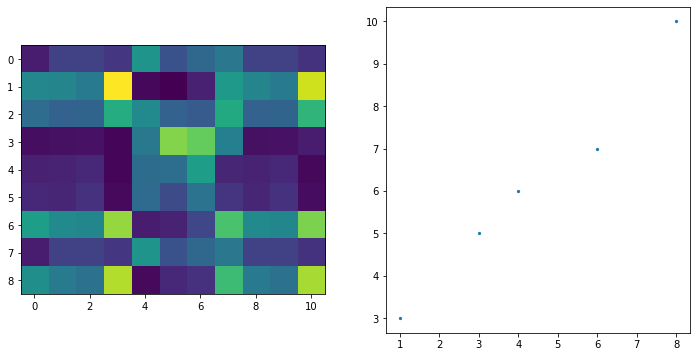

In [86]:
pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

alpha = 0.2
penalty = 0.2
sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha - penalty

alignment = align3(sims_rel)

print(sum(sims[i, j] for i, j in alignment) / min(sims.shape))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sims_rel)
plt.subplot(1, 2, 2)
plt.scatter(*list(zip(*alignment)), s=5);

Общий скор:
* плохо: 9%
* такое себе: 14%
* хорошо: 45%

Отдельные скоры:
* плохо: 40-50%
* хорошо: даже 34% и 45% (при хорошем выравнивании)

In [87]:
for i, j in alignment:
    print(sents_ru[i])
    print(sents_er[j])
    print(sims[i, j])
    print('-')

Под крестом тем простеньким, Ветром убаюканный, Спит какой-то молодец Беспробудным сном...
Свалшкань удомасонзо Калмосонть цёра уды, Велькссэнзэ вармась увны - Цёрасонть лайши.
0.7004702323012881
-
Ты моя кровинушка, Мой соколик ясненький, Отчего так долго ты Не идёшь домой?
- Косо тон, монь цёрынем, Косат, седей пелькскинем, Учоват - а учоват, Сырнень покольнем?
0.492095361934619
-
Неужели, родненький, Больше не увидимся?
Арази, монь сяткинем, Мартот ней а вастован, Куломадон икеле Мон тонь а нейтян?
0.3021280071403407
-
Ой ты, горе-горюшко, Выскребло до донышка, Всё, что мне отпущено, А сыночка нет...
Горясь кевекс лепштимим, Вийтеме монь кадымим Яла лайшан- авардян, Тонь, цёрам, учан.
0.5004115749807919
-
Под крестом тем простеньким, Ветром убаюканный, Спит твоя кровинушка Ясный сокол твой...
Свалшкань удомасонзо Калмосонть цёрат уды, Велькссэнзэ вармась увны - Цёрасот лайши.
0.6103380186991259
-


In [88]:
lj_pairs = []

In [92]:
tq = tqdm(list(possibly_parallel.keys()))
for url in tq:
    sents_er = make_sents(possibly_parallel[url][0])
    sents_ru = make_sents(possibly_parallel[url][1])
    
    emb_ru = np.stack([embed(s) for s in sents_ru])
    emb_er = np.stack([embed(s) for s in sents_er])
    
    pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
    sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

    alpha = 0.2
    penalty = 0.2
    sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha - penalty

    alignment = align3(sims_rel)

    total_score = sum(sims[i, j] for i, j in alignment) / min(sims.shape)
    if total_score < 0.15:
        continue
    
    for i, j in alignment:
        if sims[i, j] >= 0.40: # порог высоковат; часть предложений мы потеряем, но полученные зато будут чистыми
            lj_pairs.append([sents_er[j], sents_ru[i]])
    tq.set_description(str(len(lj_pairs)))

  0%|          | 0/250 [00:00<?, ?it/s]

In [96]:
random.choice(lj_pairs)

['Кольни сексесь а кевкстни киньгак, Ерты лопат ламо пильгеть малас.',
 'Припев: Шалунья - осень придёт, не спросит И бросит листья к твоим ногам...']

In [97]:
with open('other_sources/livejournal_myv_ru_aligned.json', 'w') as f:
    json.dump(lj_pairs, f, ensure_ascii=False)